# DSBDAL Assignment 2 - Data Wrangling II

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading csv file

In [2]:
df=pd.read_csv('student_data.csv')

## Displaying first 5 records

In [3]:
df.head()

,rollno,branch,marksPhy,marksChem,marksEM1,marksELEC,marksSME,Percentage,attendance,gender
0,1,Comp,50.0,39.0,45.0,99.0,90.0,64.6,78.0,M
1,2,IT,33.0,77.0,33.0,54.0,54.0,50.2,88.0,M
2,3,IT,55.0,86.0,66.0,34.0,67.0,61.6,99.0,F
3,4,IT,77.0,79.0,88.0,67.0,NaN,62.2,76.0,F
4,5,Comp,1000.0,56.0,99.0,NaN,76.0,246.2,75.0,F


## Exploring Data

In [4]:
df.isnull().sum().sort_values(ascending=False)

marksPhy      15
marksEM1      14
attendance    11
marksSME      10
marksELEC      4
marksChem      2
rollno         0
branch         0
Percentage     0
gender         0
dtype: int64

In [5]:
df.describe()

,rollno,marksPhy,marksChem,marksEM1,marksELEC,marksSME,Percentage,attendance
count,100.000000,85.000000,98.000000,86.000000,96.000000,90.000000,100.000000,89.000000
mean,50.500000,79.635294,71.316327,71.267442,83.760417,68.333333,68.156000,83.438202
std,29.011492,118.834403,36.234800,38.161399,117.578171,53.115308,35.503189,21.918213
min,1.000000,-55.000000,-44.000000,-45.000000,-99.000000,-88.000000,17.400000,-99.000000
25%,25.750000,54.000000,56.000000,56.000000,58.500000,54.250000,50.800000,78.000000
50%,50.500000,67.000000,74.000000,67.000000,77.500000,67.000000,63.100000,87.000000
75%,75.250000,88.000000,88.000000,88.000000,90.000000,87.750000,75.200000,90.000000
max,100.000000,1000.000000,333.000000,333.000000,1111.000000,444.000000,274.000000,99.000000


In [6]:
df.dtypes


rollno          int64
branch         object
marksPhy      float64
marksChem     float64
marksEM1      float64
marksELEC     float64
marksSME      float64
Percentage    float64
attendance    float64
gender         object
dtype: object

In [7]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


Our data set contains 100 rows and 10 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rollno      100 non-null    int64  
 1   branch      100 non-null    object 
 2   marksPhy    85 non-null     float64
 3   marksChem   98 non-null     float64
 4   marksEM1    86 non-null     float64
 5   marksELEC   96 non-null     float64
 6   marksSME    90 non-null     float64
 7   Percentage  100 non-null    float64
 8   attendance  89 non-null     float64
 9   gender      100 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB


In [9]:
df.branch.value_counts()

ENTC    41
IT      33
Comp    26
Name: branch, dtype: int64

## Preprocessing Data 

### Replacing out of bound values with Nan

In [10]:
pd.options.mode.chained_assignment = None
for i in range(df.shape[0]):
    if(df.marksPhy[i]<0 or df.marksPhy[i]>100):
        df.marksPhy[i]=(np.nan)
        
for i in range(df.shape[0]):
    if(df.marksChem[i]<0 or df.marksChem[i]>100):
        df.marksChem[i]=(np.nan)
       
for i in range(df.shape[0]):
    if(df.marksEM1[i]<0 or df.marksEM1[i]>100):
        df.marksEM1[i]=(np.nan)
        
for i in range(df.shape[0]):
    if(df.marksELEC[i]<0 or df.marksELEC[i]>100):
        df.marksELEC[i]=(np.nan)
       
for i in range(df.shape[0]):
    if(df.marksSME[i]<0 or df.marksSME[i]>100):
        df.marksSME[i]=(np.nan)
    
for i in range(df.shape[0]):
    if(df.attendance[i]<0 or df.attendance[i]>100):
        df.attendance[i]=(np.nan)
        


### Handling outliers 

<AxesSubplot:>

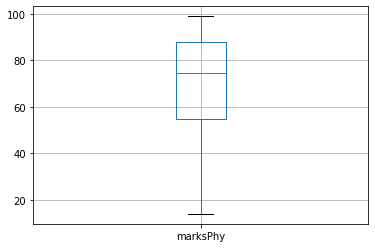

In [11]:
df.boxplot(column=['marksPhy'],return_type='axes')

<AxesSubplot:>

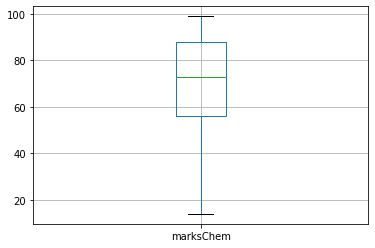

In [12]:
df.boxplot(column=['marksChem'],return_type='axes')

<AxesSubplot:>

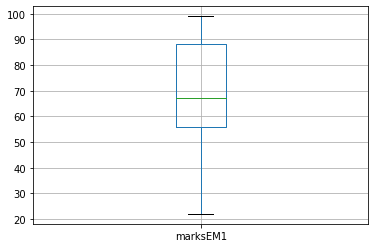

In [13]:
df.boxplot(column=['marksEM1'],return_type='axes')

<AxesSubplot:>

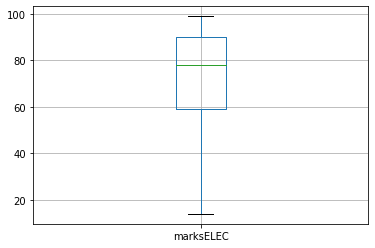

In [14]:
df.boxplot(column=['marksELEC'],return_type='axes')

### marksSME column has outliers and is handeled by replcing records with median


<AxesSubplot:>

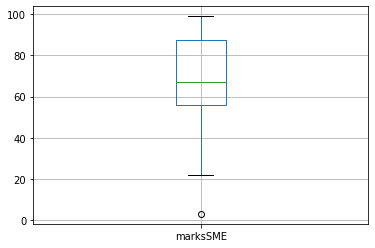

In [15]:
df.boxplot(column=['marksSME'],return_type='axes')

In [16]:
Q1=df['marksSME'].quantile(0.25)
Q3=df['marksSME'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['marksSME']>Lower_Whisker, 'marksSME'].median()
df['marksSME']=np.where(df['marksSME']<Lower_Whisker,median,df['marksSME'])
# df.loc[df.marksSME > 75, 'Age'] = np.nan
# df.fillna(median,inplace=True)
#df=df[df['marksSME']>Lower_Whisker]

<AxesSubplot:>

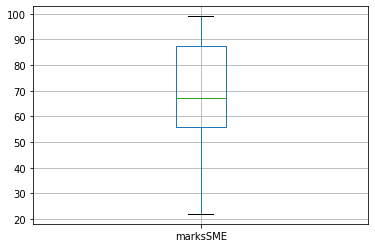

In [17]:
df.boxplot(column=['marksSME'],return_type='axes')

### Filling the null values with mean values

In [18]:
df['marksPhy'].fillna((df['marksPhy'].mean()),inplace=True)
df['marksChem'].fillna((df['marksChem'].mean()),inplace=True)
df['marksEM1'].fillna((df['marksEM1'].mean()),inplace=True)
df['marksELEC'].fillna((df['marksELEC'].mean()),inplace=True)
df['marksSME'].fillna((df['marksSME'].mean()),inplace=True)

### Calculating the percentage

In [19]:
df['Percentage']=(df['marksPhy']+df['marksChem']+df['marksEM1']+df['marksELEC']+df['marksSME'])/5

### Percentage column has a outlier and is handeled by deleting that respective record

<AxesSubplot:>

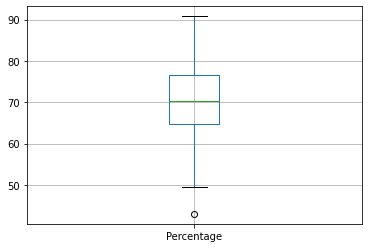

In [20]:
df.boxplot(column=['Percentage'],return_type='axes')

In [21]:
Q1=df['Percentage'].quantile(0.25)
Q3=df['Percentage'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
df=df[df['Percentage']>Lower_Whisker]

<AxesSubplot:>

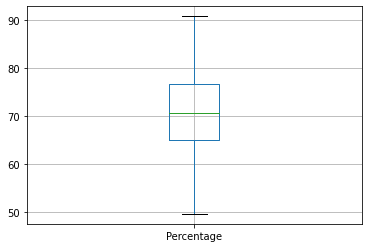

In [22]:
df.boxplot(column=['Percentage'],return_type='axes')

### Attendance column has outliers and is handeled by replcing records with median


<AxesSubplot:>

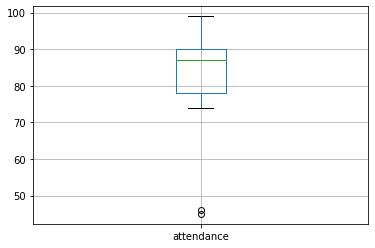

In [23]:
df.boxplot(column=['attendance'],return_type='axes')

In [24]:
Q1=df['attendance'].quantile(0.25)
Q3=df['attendance'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['attendance']>Lower_Whisker, 'attendance'].median()
df['attendance']=np.where(df['attendance']<Lower_Whisker,median,df['attendance'])



<AxesSubplot:>

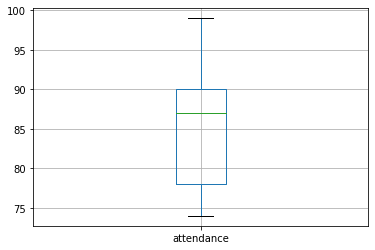

In [25]:
df.boxplot(column=['attendance'],return_type='axes')

In [26]:
df['attendance'].fillna((df['attendance'].mean()),inplace=True)

## Using MinMaxScaler to scale the data

In [27]:
from sklearn.preprocessing import MinMaxScaler


In [28]:
scaler = MinMaxScaler()
cols=['marksPhy','marksChem','marksEM1','marksELEC','marksSME']
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])
df[cols].describe().loc[['min', 'max']]


,marksPhy,marksChem,marksEM1,marksELEC,marksSME
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [29]:
df['attendance'].min()

74.0

In [32]:
df['attendance'].max()

99.0

In [34]:
cut_points=[70,80,90,100]
labels=['poor','average','excellent']
df['Attendance Remark']=pd.cut(df['attendance'],bins=cut_points,labels=labels)

In [35]:
df.sample(10)

,rollno,branch,marksPhy,marksChem,marksEM1,marksELEC,marksSME,Percentage,attendance,gender,Attendance Remark
95,96,Comp,0.648718,0.894118,0.697368,0.964706,0.701299,81.428205,87.000000,M,average
68,69,Comp,0.505882,0.105882,0.697368,0.494118,0.602814,56.083333,87.000000,M,average
36,37,IT,0.648718,0.717647,0.407895,0.211765,0.558442,59.028205,92.000000,M,excellent
80,81,Comp,0.470588,0.282353,0.447368,0.729412,0.441558,56.200000,87.000000,F,average
8,9,ENTC,1.000000,0.870588,0.881579,0.364706,0.883117,82.400000,88.000000,F,average
20,21,Comp,0.752941,1.000000,0.684211,0.952941,0.415584,80.200000,87.000000,F,average
76,77,IT,0.470588,0.352941,0.881579,0.894118,0.558442,68.600000,77.000000,F,poor
30,31,ENTC,0.835294,0.835294,0.434211,0.223529,0.584416,65.200000,95.000000,M,excellent
50,51,ENTC,0.648718,0.494118,0.934211,0.752941,0.519481,71.828205,86.425287,F,average
87,88,ENTC,0.223529,0.811765,0.881579,0.564706,0.602814,67.283333,90.000000,M,average


In [36]:
df.to_csv("processed_student_data.csv")